# Patience Treatment Classification

Dataset: [link](https://www.kaggle.com/saurabhshahane/patient-treatment-classification)

Tutorial: [Gabriel Atkin](https://www.youtube.com/watch?v=KCuHu-omxYE&ab_channel=GabrielAtkin)

## Import modules and datasets

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("../input/patient-treatment-classification/data-ori.csv")

In [3]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


## Preprocessing

In [5]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Binary encoding
    df['SEX'] = df['SEX'].replace({'F':0, 'M':1})
    
    # Split df into X and y
    X = df.drop('SOURCE', axis=1)
    y = df['SOURCE']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [7]:
X_train

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
2275,1.521571,0.918324,4.205082,-0.507635,-0.368181,-3.543672,-1.886871,-3.523787,0.113088,-1.043023
4093,-0.590225,-0.613524,-0.673427,-0.468456,-0.184678,0.106741,-0.267275,0.263954,1.411455,-1.043023
1727,-1.512041,-1.618799,-1.463160,0.099634,1.195966,-0.228501,-0.996093,0.191392,-0.350615,-1.043023
615,0.817639,0.870454,0.765924,-0.488046,-0.140986,0.032243,0.380563,-0.127881,-1.138910,0.958752
1610,0.348351,0.391752,-0.036546,-0.311742,0.260973,0.665478,0.299583,0.670302,-0.443356,-1.043023
...,...,...,...,...,...,...,...,...,...,...
2895,0.029906,0.056660,-0.240348,-0.781885,0.531859,0.479233,0.137624,0.510665,0.576790,-1.043023
2763,-0.003615,-0.278432,-0.533314,-0.703528,0.182329,0.479233,-1.158053,1.149211,0.484050,-1.043023
905,1.320448,1.444897,0.753186,-0.488046,0.907604,0.926222,0.704482,0.742864,-0.953429,0.958752
3980,-0.539944,-0.565653,-0.558789,-0.703528,-0.420611,-0.005006,-0.267275,0.089805,1.318715,0.958752


In [8]:
y_train.value_counts()

out    1834
in     1254
Name: SOURCE, dtype: int64

## Training

In [9]:
models = {
    "Logistic Regression": LogisticRegression(),
    "  Gradient Boosting": GradientBoostingClassifier(),
    "     Neural Network": MLPClassifier(),
    "      Decision Tree": DecisionTreeClassifier(),
    "      Random Forest": RandomForestClassifier()
}

In [10]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained")

Logistic Regression trained
  Gradient Boosting trained
     Neural Network trained
      Decision Tree trained
      Random Forest trained


## Result

In [11]:
acc_save = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(name + " Accuracy: {:.2f}%".format(acc * 100))
    acc_save.append(acc)

Logistic Regression Accuracy: 71.15%
  Gradient Boosting Accuracy: 73.64%
     Neural Network Accuracy: 74.32%
      Decision Tree Accuracy: 66.39%
      Random Forest Accuracy: 74.09%


In [12]:
f1_save = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, pos_label='in')
    print(name + " Accuracy: {:.5f}%".format(f1))
    f1_save.append(f1)

Logistic Regression Accuracy: 0.59705%
  Gradient Boosting Accuracy: 0.64783%
     Neural Network Accuracy: 0.66135%
      Decision Tree Accuracy: 0.58758%
      Random Forest Accuracy: 0.66073%


## Visualization

In [13]:
model_name = list(models.keys())

In [14]:
acc_save

[0.7114803625377644,
 0.736404833836858,
 0.743202416918429,
 0.6638972809667674,
 0.7409365558912386]

In [15]:
f1_save

[0.5970464135021097,
 0.6478304742684157,
 0.6613545816733067,
 0.58758109360519,
 0.6607319485657764]

In [16]:
df_compare = pd.DataFrame(list(zip(acc_save, f1_save)), index=[model_name], columns=['acc_test', 'f1_test'])

In [17]:
df_compare

,acc_test,f1_test
Logistic Regression,0.711480,0.597046
Gradient Boosting,0.736405,0.647830
Neural Network,0.743202,0.661355
Decision Tree,0.663897,0.587581
Random Forest,0.740937,0.660732


Text(0, 0.5, 'Score')

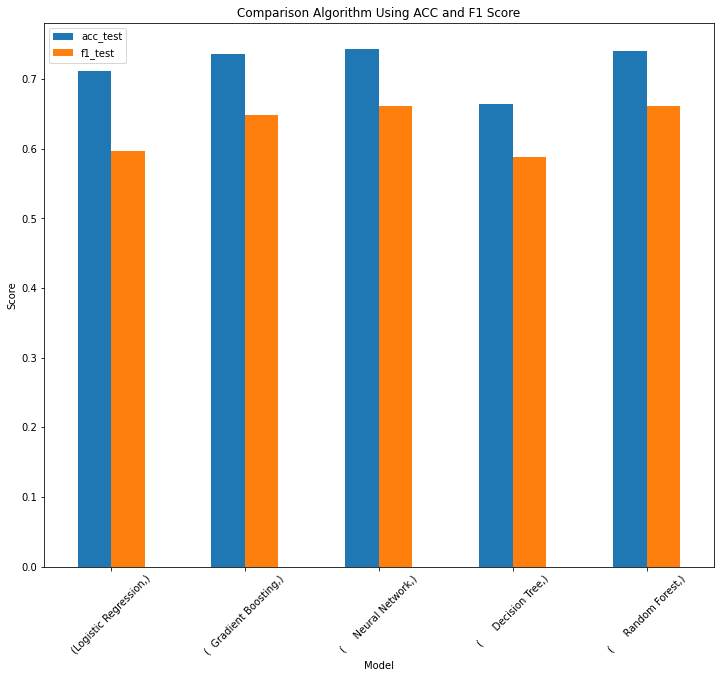

In [26]:
df_compare.plot(kind='bar', figsize=(12,10))
plt.title("Comparison Algorithm Using ACC and F1 Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.ylabel("Score")

Text(0, 0.5, 'Model')

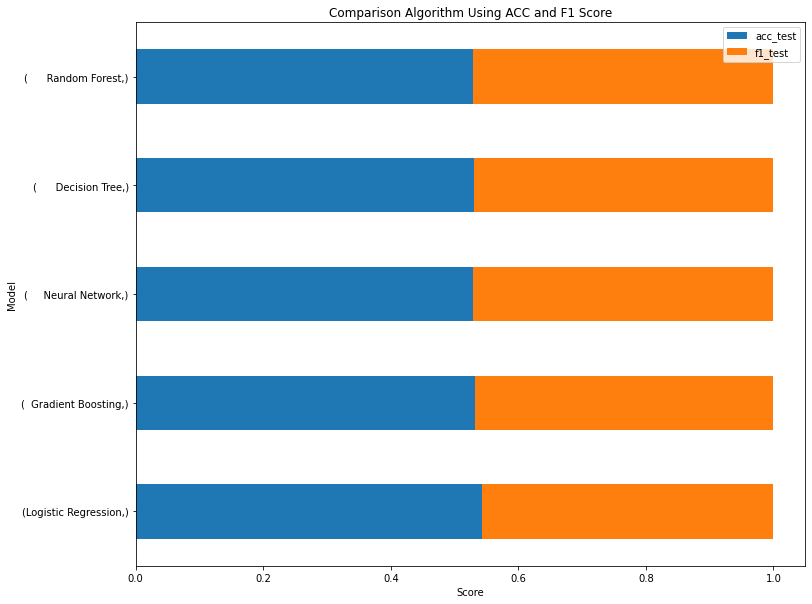

In [27]:
stacked_data = df_compare.apply(lambda x: x*1/sum(x), axis=1)
stacked_data.plot(kind='barh', figsize=(12,10), stacked=True)
plt.title("Comparison Algorithm Using ACC and F1 Score")
plt.xlabel("Score")
plt.ylabel("Model")